# data-cleaning

Use the "Run" button to execute the code.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [5]:
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'

airbnb_ori = pd.read_csv(airbnb_url)
airbnb = airbnb_ori.copy()

In [6]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data type

In [8]:
cat_df = airbnb.select_dtypes(include=['object'])
num_df = airbnb.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")

    print("")

    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

Numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


## Visualize missing values

In [9]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(airbnb)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


In [10]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(airbnb)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


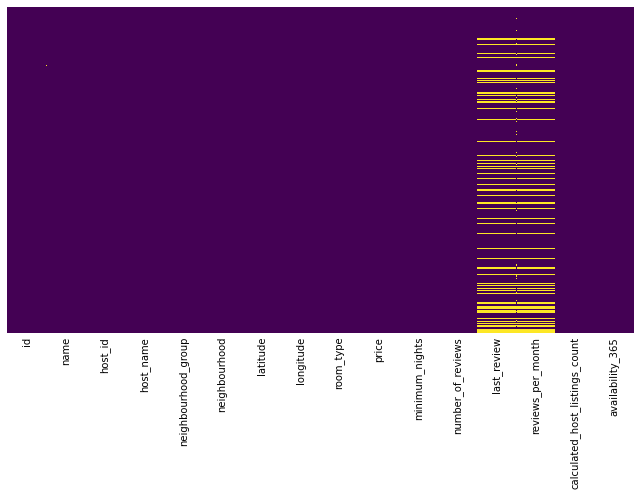

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

## Dropping feature

In [12]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name','last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

missing_cols(airbnb)

name => 16
reviews_per_month => 10052


## Replace

In [13]:
# replace null values in reviews_per_month with 0 
airbnb.fillna({'reviews_per_month':0}, inplace=True)

missing_cols(airbnb)

name => 16


In [14]:
# replace null values in name with 'None'
airbnb.fillna({'name':'None'}, inplace=True)

missing_cols(airbnb)

no missing values left


In [15]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Drop rows

In [16]:
# # remove rows with missing values in price
# airbnb['price'].dropna(inplace=True)

## imputing missing values

In [17]:
# # imputing price with mean
# price_mean_value = round(airbnb['price'].mean(), 2)
# airbnb['price'].fillna(price_mean_value, inplace=True)

# # imputing price with median
# price_median_value = round(airbnb['price'].median(), 2)
# airbnb['price'].fillna(price_median_value, inplace=True)

# # imputing with bfill or ffill
# airbnb['price'].bfill(axis ='columns', inplace=True)
# airbnb['price'].ffill(axis ='columns', inplace=True)

# # imputing with SimpleImputor from the sklearn library
# from sklearn.impute import SimpleImputer
# # define the imputer
# imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median
# airbnb['price'] = imputer.fit_transform(airbnb['price'])

# # use strategy = 'most_frequent' for categorical data

## Incosistent Data

In [18]:
# example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb[airbnb['name'].str.contains(target, regex=True)]

# show rows that contains the word noisy
print(noisy_airbnb['name'])

# get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

# print(index_to_drop)

19733                     Noisy room next to Prospect Park
23857               Small Homey Studio in a Big Noisy City
35343    My wife is not used to the noisy environment. How
Name: name, dtype: object


In [19]:
# drop rows based on index
airbnb.drop(index_to_drop, axis='index', inplace=True)

print(len(airbnb_ori))
print(len(airbnb))

48895
48892


In [20]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [21]:
random_index = airbnb.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20101
Queens            5666
Bronx             1091
Staten Island      373
brookln              1
manhatann            1
Name: neighbourhood_group, dtype: int64

In [22]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20102
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [23]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb.rename(columns=new_names, inplace=True)
airbnb.head()

,listing_name,host_id,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [24]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

In [25]:
airbnb_ori['last_review'] = pd.to_datetime(airbnb_ori['last_review'], format='%Y-%m-%d')
airbnb_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [26]:
airbnb_ori['id'] = airbnb_ori['id'].astype('int32')
airbnb_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int32         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

## Dealing with outliers

In [27]:
airbnb['price'].describe()

count    48892.000000
mean       152.714023
std        240.156106
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

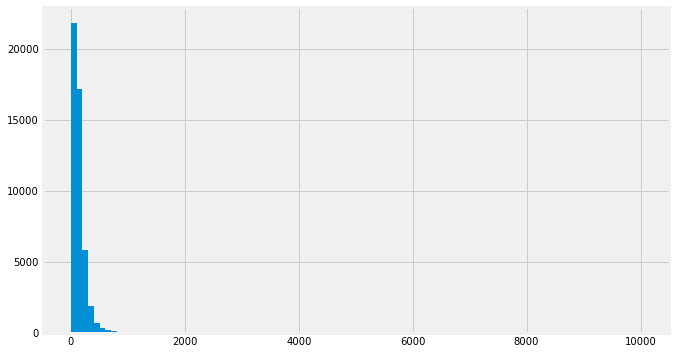

In [28]:
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

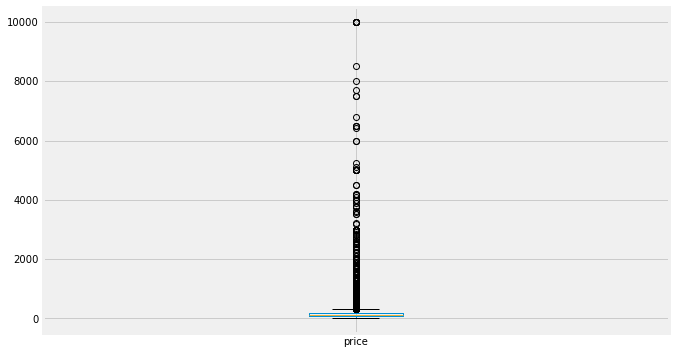

In [29]:
plt.figure(figsize=(10, 6))
airbnb.boxplot(column=['price'])

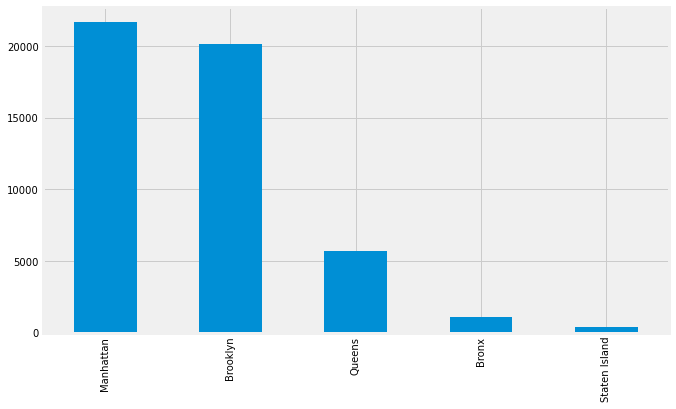

In [30]:
plt.figure(figsize=(10, 6))
airbnb['neighbourhood_group'].value_counts().plot.bar()